### 24cm_run8 

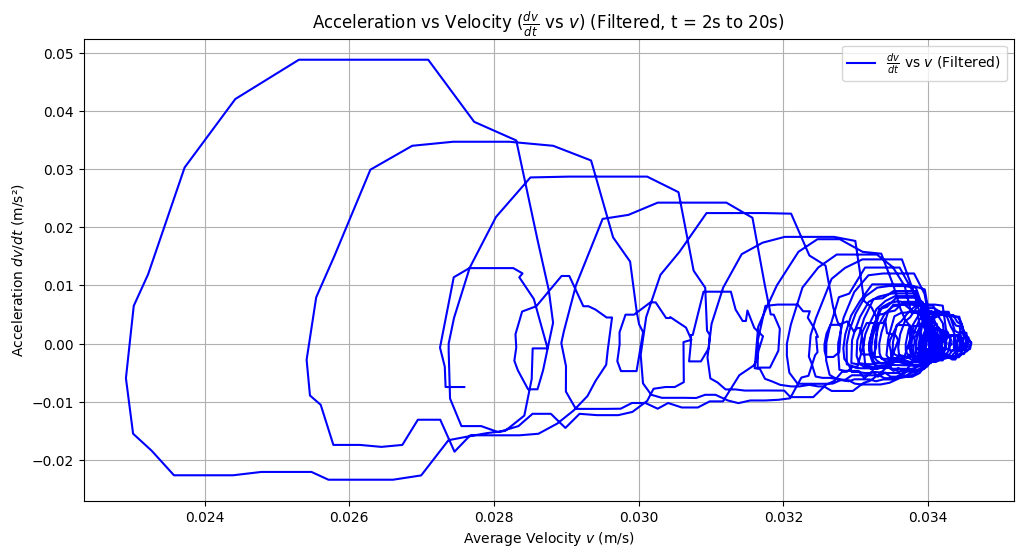

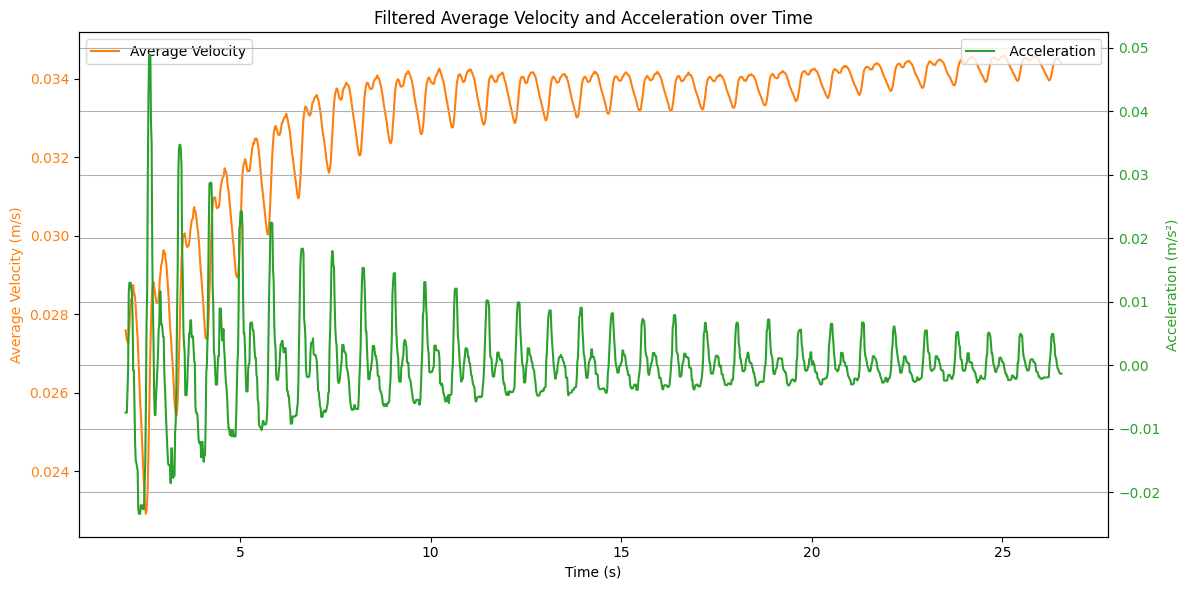

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

def analyze_and_plot(file_path, x_length_meters=1.6, y_length_meters=0.9, fps=60):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Define normalization factors 
    y_length_pixels = pd.to_numeric(df.iloc[2:, 1::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, 1::2].min().min(), errors='coerce')
    normalization_factor_y = y_length_meters / y_length_pixels

    x_length_pixels = pd.to_numeric(df.iloc[2:, ::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, ::2].min().min(), errors='coerce')
    normalization_factor_x = x_length_meters / x_length_pixels

    # Extract x and y coordinates for the markers, skipping the first two rows
    coordinates_df = df.iloc[2:, :44].apply(pd.to_numeric, errors='coerce')  # Ensure numeric values

    # Separate x and y coordinates and normalize them
    x_coords = coordinates_df.iloc[:, ::2] * normalization_factor_x  # Normalize x-coordinates
    y_coords = coordinates_df.iloc[:, 1::2] * normalization_factor_y  # Normalize y-coordinates

    # Calculate mean position over markers
    mean_x_position = x_coords.mean(axis=1).values
    mean_y_position = y_coords.mean(axis=1).values
    
    # Time array
    time = np.arange(len(mean_x_position)) / fps

    # --- Instantaneous Velocity Calculation ---
    # Calculate differences in position between consecutive frames
    delta_x = np.diff(mean_x_position)
    delta_y = np.diff(mean_y_position)
    
    # Compute instantaneous velocities
    velocity_x = delta_x * fps
    velocity_y = delta_y * fps
    instantaneous_velocity = np.sqrt(velocity_x**2 + velocity_y**2)

    # Adjust time array for instantaneous velocity
    time_instantaneous = time[1:]

    # --- Average Velocity Calculation ---
    # Calculate displacement from initial position at each time point
    displacement_x = mean_x_position - mean_x_position[0]
    displacement_y = mean_y_position - mean_y_position[0]
    total_displacement = np.sqrt(displacement_x**2 + displacement_y**2)
    
    # Avoid division by zero at t=0 by starting from index 1
    average_velocity = total_displacement[1:] / time[1:]

    # --- Compute dv/dt for Average Velocity ---
    dv = np.diff(average_velocity)
    dt = np.diff(time[1:])  # Time differences corresponding to dv
    dv_dt = dv / dt  # Acceleration (m/s^2)
    # Adjust time array for dv/dt
    time_dv_dt = time[2:]  # Since dv/dt is two elements shorter than time

    # --- Crop data for t from 2 to 20 seconds ---
    start_time = 2  # seconds
    end_time = 40  # seconds

    # Indices for the specified time range for d velocity and dv/dt
    indices_v = np.where((time[1:] >= start_time) & (time[1:] <= end_time))
    indices_dv_dt = np.where((time_dv_dt >= start_time) & (time_dv_dt <= end_time))

    # Crop the data arrays for average velocity
    cropped_time_v = time[1:][indices_v]
    cropped_avg_velocity = average_velocity[indices_v]

    # Crop the data arrays for dv/dt
    cropped_time_dv_dt = time_dv_dt[indices_dv_dt]
    cropped_dv_dt = dv_dt[indices_dv_dt]
    cropped_avg_velocity_for_dv_dt = average_velocity[1:][indices_dv_dt]  # Align average_velocity with dv/dt

    # --- Apply Median Filter to remove spikes in acceleration ---
    kernel_size = 5  # Choose a kernel size (odd number), larger sizes filter more aggressively
    filtered_dv_dt = medfilt(cropped_dv_dt, kernel_size)

    # --- Plot dv/dt vs Average Velocity (Filtered) ---
    plt.figure(figsize=(12, 6))
    plt.plot(cropped_avg_velocity_for_dv_dt, filtered_dv_dt, label=r'$\frac{dv}{dt}$ vs $v$ (Filtered)', color='blue')
    plt.xlabel('Average Velocity $v$ (m/s)')
    plt.ylabel('Acceleration $dv/dt$ (m/s²)')
    plt.title(r'Acceleration vs Velocity ($\frac{dv}{dt}$ vs $v$) (Filtered, t = 2s to 20s)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Optional: Plot Filtered Average Velocity and dv/dt over Time ---
    fig, ax1 = plt.subplots(figsize=(12, 6))

    color = 'tab:orange'
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Average Velocity (m/s)', color=color)
    ax1.plot(cropped_time_v, cropped_avg_velocity, color=color, label='Average Velocity')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis

    color = 'tab:green'
    ax2.set_ylabel('Acceleration (m/s²)', color=color)  # we already handled the x-label with ax1
    ax2.plot(cropped_time_dv_dt, filtered_dv_dt, color=color, label=' Acceleration')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    plt.title('Filtered Average Velocity and Acceleration over Time')
    fig.tight_layout()  # Otherwise the right y-label is slightly clipped
    plt.grid(True)
    plt.show()

# Path to the CSV file
file_path = '/Users/jamesxu/Downloads/24cm_new-James-2024-10-02/videos/24cm_run8DLC_resnet50_24cm_newOct2shuffle1_100000_filtered.csv'

# Run the function
analyze_and_plot(file_path)


### 32cm

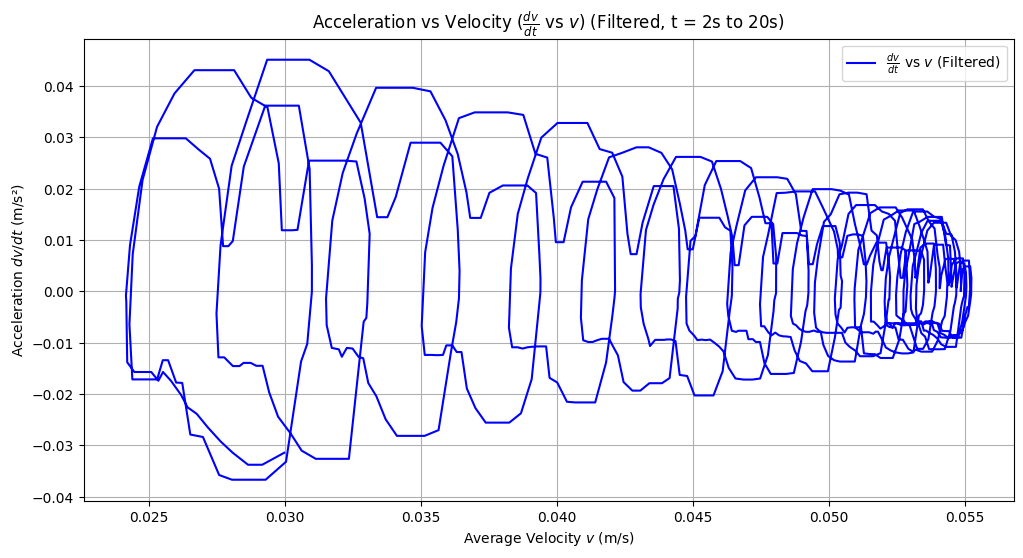

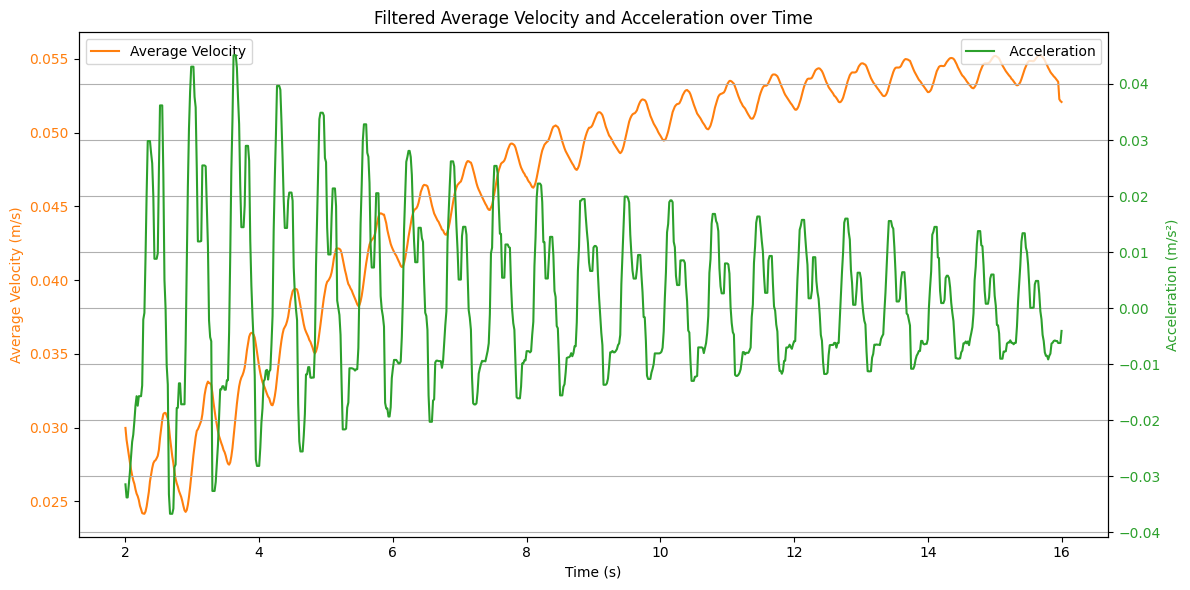

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

def analyze_and_plot(file_path, x_length_meters=1.6, y_length_meters=0.9, fps=60):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Define normalization factors 
    y_length_pixels = pd.to_numeric(df.iloc[2:, 1::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, 1::2].min().min(), errors='coerce')
    normalization_factor_y = y_length_meters / y_length_pixels

    x_length_pixels = pd.to_numeric(df.iloc[2:, ::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, ::2].min().min(), errors='coerce')
    normalization_factor_x = x_length_meters / x_length_pixels

    # Extract x and y coordinates for the markers, skipping the first two rows
    coordinates_df = df.iloc[2:, :44].apply(pd.to_numeric, errors='coerce')  # Ensure numeric values

    # Separate x and y coordinates and normalize them
    x_coords = coordinates_df.iloc[:, ::2] * normalization_factor_x  # Normalize x-coordinates
    y_coords = coordinates_df.iloc[:, 1::2] * normalization_factor_y  # Normalize y-coordinates

    # Calculate mean position over markers
    mean_x_position = x_coords.mean(axis=1).values
    mean_y_position = y_coords.mean(axis=1).values
    
    # Time array
    time = np.arange(len(mean_x_position)) / fps

    # --- Instantaneous Velocity Calculation ---
    # Calculate differences in position between consecutive frames
    delta_x = np.diff(mean_x_position)
    delta_y = np.diff(mean_y_position)
    
    # Compute instantaneous velocities
    velocity_x = delta_x * fps
    velocity_y = delta_y * fps
    instantaneous_velocity = np.sqrt(velocity_x**2 + velocity_y**2)

    # Adjust time array for instantaneous velocity
    time_instantaneous = time[1:]

    # --- Average Velocity Calculation ---
    # Calculate displacement from initial position at each time point
    displacement_x = mean_x_position - mean_x_position[0]
    displacement_y = mean_y_position - mean_y_position[0]
    total_displacement = np.sqrt(displacement_x**2 + displacement_y**2)
    
    # Avoid division by zero at t=0 by starting from index 1
    average_velocity = total_displacement[1:] / time[1:]

    # --- Compute dv/dt for Average Velocity ---
    dv = np.diff(average_velocity)
    dt = np.diff(time[1:])  # Time differences corresponding to dv
    dv_dt = dv / dt  # Acceleration (m/s^2)
    # Adjust time array for dv/dt
    time_dv_dt = time[2:]  # Since dv/dt is two elements shorter than time

    # --- Crop data for t from 2 to 20 seconds ---
    start_time = 2  # seconds
    end_time = 16  # seconds

    # Indices for the specified time range for average velocity and dv/dt
    indices_v = np.where((time[1:] >= start_time) & (time[1:] <= end_time))
    indices_dv_dt = np.where((time_dv_dt >= start_time) & (time_dv_dt <= end_time))

    # Crop the data arrays for average velocity
    cropped_time_v = time[1:][indices_v]
    cropped_avg_velocity = average_velocity[indices_v]

    # Crop the data arrays for dv/dt
    cropped_time_dv_dt = time_dv_dt[indices_dv_dt]
    cropped_dv_dt = dv_dt[indices_dv_dt]
    cropped_avg_velocity_for_dv_dt = average_velocity[1:][indices_dv_dt]  # Align average_velocity with dv/dt

    # --- Apply Median Filter to remove spikes in acceleration ---
    kernel_size = 5  # Choose a kernel size (odd number), larger sizes filter more aggressively
    filtered_dv_dt = medfilt(cropped_dv_dt, kernel_size)

    # --- Plot dv/dt vs Average Velocity (Filtered) ---
    plt.figure(figsize=(12, 6))
    plt.plot(cropped_avg_velocity_for_dv_dt, filtered_dv_dt, label=r'$\frac{dv}{dt}$ vs $v$ (Filtered)', color='blue')
    plt.xlabel('Average Velocity $v$ (m/s)')
    plt.ylabel('Acceleration $dv/dt$ (m/s²)')
    plt.title(r'Acceleration vs Velocity ($\frac{dv}{dt}$ vs $v$) (Filtered, t = 2s to 20s)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Optional: Plot Filtered Average Velocity and dv/dt over Time ---
    fig, ax1 = plt.subplots(figsize=(12, 6))

    color = 'tab:orange'
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Average Velocity (m/s)', color=color)
    ax1.plot(cropped_time_v, cropped_avg_velocity, color=color, label='Average Velocity')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis

    color = 'tab:green'
    ax2.set_ylabel('Acceleration (m/s²)', color=color)  # we already handled the x-label with ax1
    ax2.plot(cropped_time_dv_dt, filtered_dv_dt, color=color, label=' Acceleration')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    plt.title('Filtered Average Velocity and Acceleration over Time')
    fig.tight_layout()  # Otherwise the right y-label is slightly clipped
    plt.grid(True)
    plt.show()

# Path to the CSV file
file_path = '/Users/jamesxu/Downloads/tracking-2/32cm_new-James-2024-10-02/videos/32cm_run9DLC_resnet50_32cm_newOct2shuffle1_100000_filtered.csv'

# Run the function
analyze_and_plot(file_path)


# 32cm

The system converges to steady state at t = 3.82 seconds.


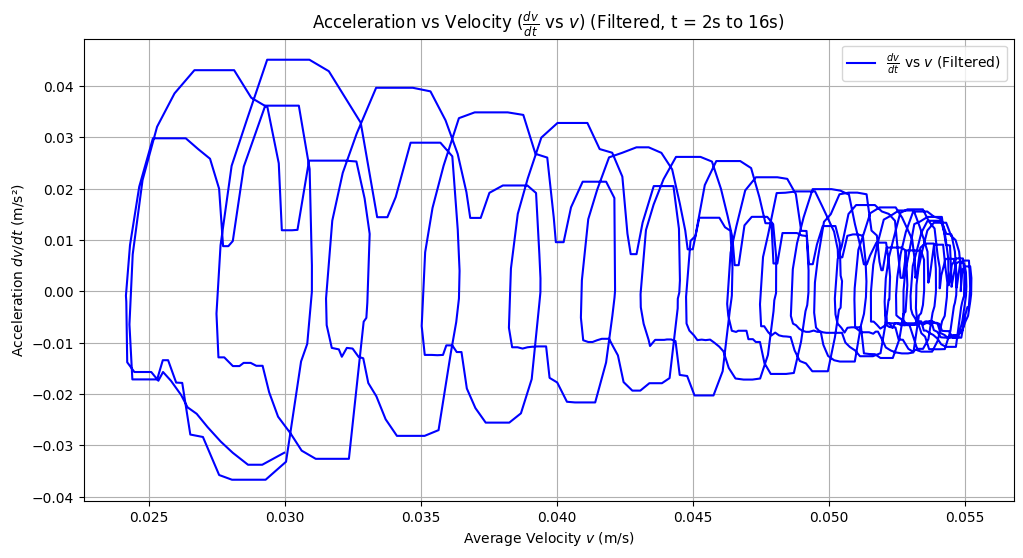

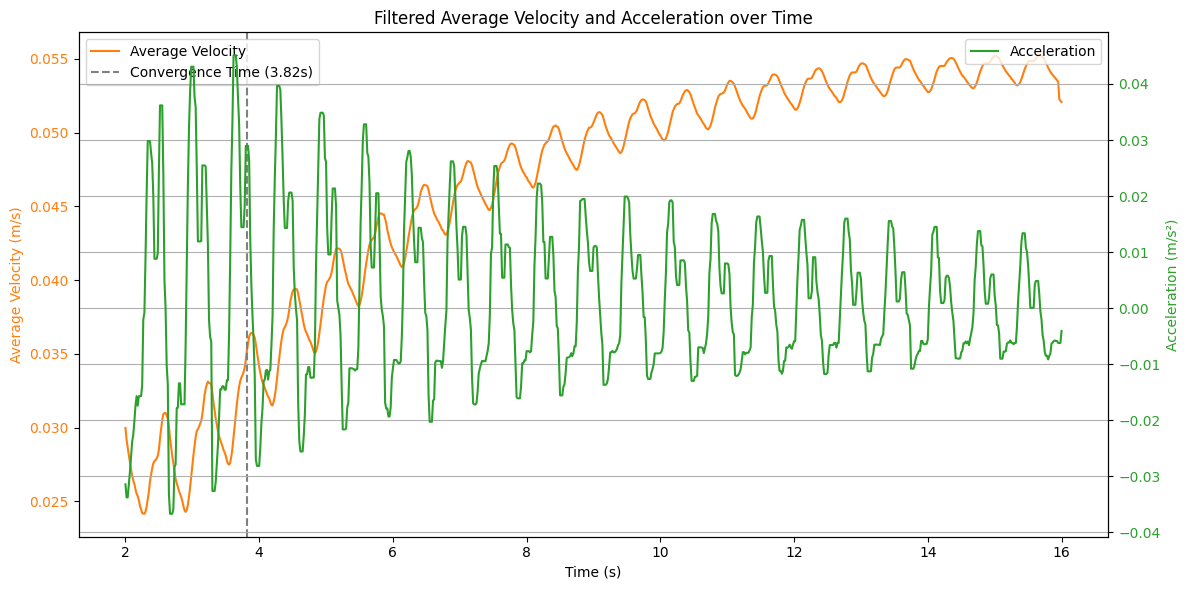

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

def analyze_and_plot(file_path, x_length_meters=1.6, y_length_meters=0.9, fps=60):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Define normalization factors 
    y_length_pixels = pd.to_numeric(df.iloc[2:, 1::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, 1::2].min().min(), errors='coerce')
    normalization_factor_y = y_length_meters / y_length_pixels

    x_length_pixels = pd.to_numeric(df.iloc[2:, ::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, ::2].min().min(), errors='coerce')
    normalization_factor_x = x_length_meters / x_length_pixels

    # Extract x and y coordinates for the markers, skipping the first two rows
    coordinates_df = df.iloc[2:, :44].apply(pd.to_numeric, errors='coerce')  # Ensure numeric values

    # Separate x and y coordinates and normalize them
    x_coords = coordinates_df.iloc[:, ::2] * normalization_factor_x  # Normalize x-coordinates
    y_coords = coordinates_df.iloc[:, 1::2] * normalization_factor_y  # Normalize y-coordinates

    # Calculate mean position over markers
    mean_x_position = x_coords.mean(axis=1).values
    mean_y_position = y_coords.mean(axis=1).values
    
    # Time array
    time = np.arange(len(mean_x_position)) / fps

    # --- Instantaneous Velocity Calculation ---
    # Calculate differences in position between consecutive frames
    delta_x = np.diff(mean_x_position)
    delta_y = np.diff(mean_y_position)
    
    # Compute instantaneous velocities
    velocity_x = delta_x * fps
    velocity_y = delta_y * fps
    instantaneous_velocity = np.sqrt(velocity_x**2 + velocity_y**2)

    # Adjust time array for instantaneous velocity
    time_instantaneous = time[1:]

    # --- Average Velocity Calculation ---
    # Calculate displacement from initial position at each time point
    displacement_x = mean_x_position - mean_x_position[0]
    displacement_y = mean_y_position - mean_y_position[0]
    total_displacement = np.sqrt(displacement_x**2 + displacement_y**2)
    
    # Avoid division by zero at t=0 by starting from index 1
    average_velocity = total_displacement[1:] / time[1:]

    # --- Compute dv/dt for Average Velocity ---
    dv = np.diff(average_velocity)
    dt = np.diff(time[1:])  # Time differences corresponding to dv
    dv_dt = dv / dt  # Acceleration (m/s²)
    # Adjust time array for dv/dt
    time_dv_dt = time[2:]  # Since dv/dt is two elements shorter than time

    # --- Crop data for t from 2 to 16 seconds ---
    start_time = 2  # seconds
    end_time = 16  # seconds

    # Indices for the specified time range for average velocity and dv/dt
    indices_v = np.where((time[1:] >= start_time) & (time[1:] <= end_time))
    indices_dv_dt = np.where((time_dv_dt >= start_time) & (time_dv_dt <= end_time))

    # Crop the data arrays for average velocity
    cropped_time_v = time[1:][indices_v]
    cropped_avg_velocity = average_velocity[indices_v]

    # Crop the data arrays for dv/dt
    cropped_time_dv_dt = time_dv_dt[indices_dv_dt]
    cropped_dv_dt = dv_dt[indices_dv_dt]
    cropped_avg_velocity_for_dv_dt = average_velocity[1:][indices_dv_dt]  # Align average_velocity with dv/dt

    # --- Apply Median Filter to remove spikes in acceleration ---
    kernel_size = 5  # Choose a kernel size (odd number), larger sizes filter more aggressively
    filtered_dv_dt = medfilt(cropped_dv_dt, kernel_size)

    # --- Calculate the convergence time ---
    # Calculate the threshold of (1 - 1/e) of the maximum average velocity after cropping
    max_avg_velocity = np.max(cropped_avg_velocity)
    threshold_velocity = (1 - 1/np.e) * max_avg_velocity  # Approximately 63.2% of max_avg_velocity

    # Find the time when average velocity reaches the threshold
    threshold_indices = np.where(cropped_avg_velocity >= threshold_velocity)[0]
    if len(threshold_indices) > 0:
        convergence_index = threshold_indices[0]
        convergence_time = cropped_time_v[convergence_index]
        print(f'The system converges to steady state at t = {convergence_time:.2f} seconds.')
    else:
        convergence_time = None
        print('The system did not reach the threshold for convergence within the specified time range.')

    # --- Plot dv/dt vs Average Velocity (Filtered) ---
    plt.figure(figsize=(12, 6))
    plt.plot(cropped_avg_velocity_for_dv_dt, filtered_dv_dt, label=r'$\frac{dv}{dt}$ vs $v$ (Filtered)', color='blue')
    plt.xlabel('Average Velocity $v$ (m/s)')
    plt.ylabel('Acceleration $dv/dt$ (m/s²)')
    plt.title(r'Acceleration vs Velocity ($\frac{dv}{dt}$ vs $v$) (Filtered, t = 2s to 16s)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Optional: Plot Filtered Average Velocity and dv/dt over Time ---
    fig, ax1 = plt.subplots(figsize=(12, 6))

    color = 'tab:orange'
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Average Velocity (m/s)', color=color)
    ax1.plot(cropped_time_v, cropped_avg_velocity, color=color, label='Average Velocity')
    ax1.tick_params(axis='y', labelcolor=color)

    # Draw vertical dashed line at convergence time
    if convergence_time is not None:
        ax1.axvline(x=convergence_time, color='gray', linestyle='--', label=f'Convergence Time ({convergence_time:.2f}s)')
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis

    color = 'tab:green'
    ax2.set_ylabel('Acceleration (m/s²)', color=color)
    ax2.plot(cropped_time_dv_dt, filtered_dv_dt, color=color, label='Acceleration')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    plt.title('Filtered Average Velocity and Acceleration over Time')
    fig.tight_layout()
    plt.grid(True)
    plt.show()

# Path to the CSV file
file_path = '/Users/jamesxu/Downloads/tracking-2/32cm_new-James-2024-10-02/videos/32cm_run9DLC_resnet50_32cm_newOct2shuffle1_100000_filtered.csv'

# Run the function
analyze_and_plot(file_path)


# 24cm

The system converges to steady state at t = 3.73 seconds.
Coasting number C = 4.78


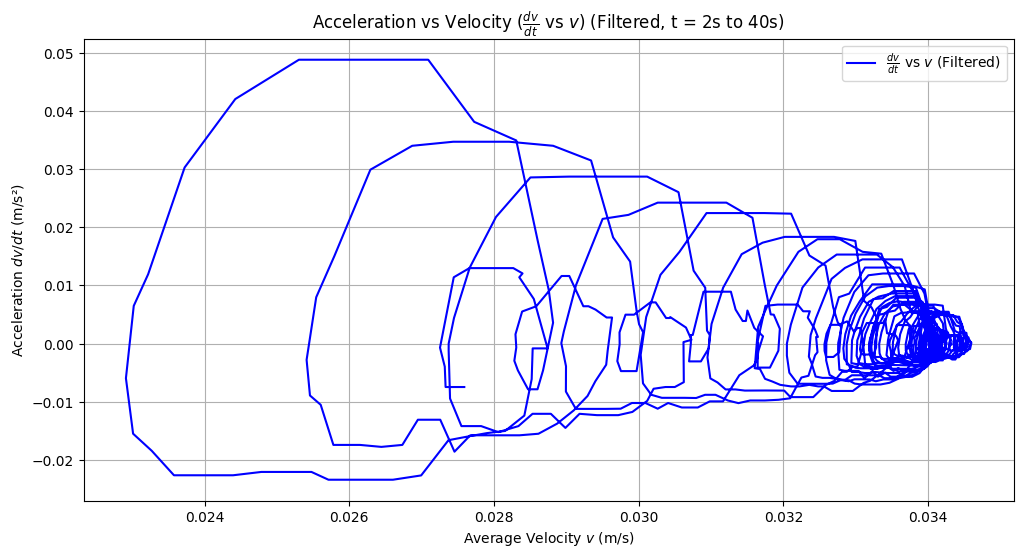

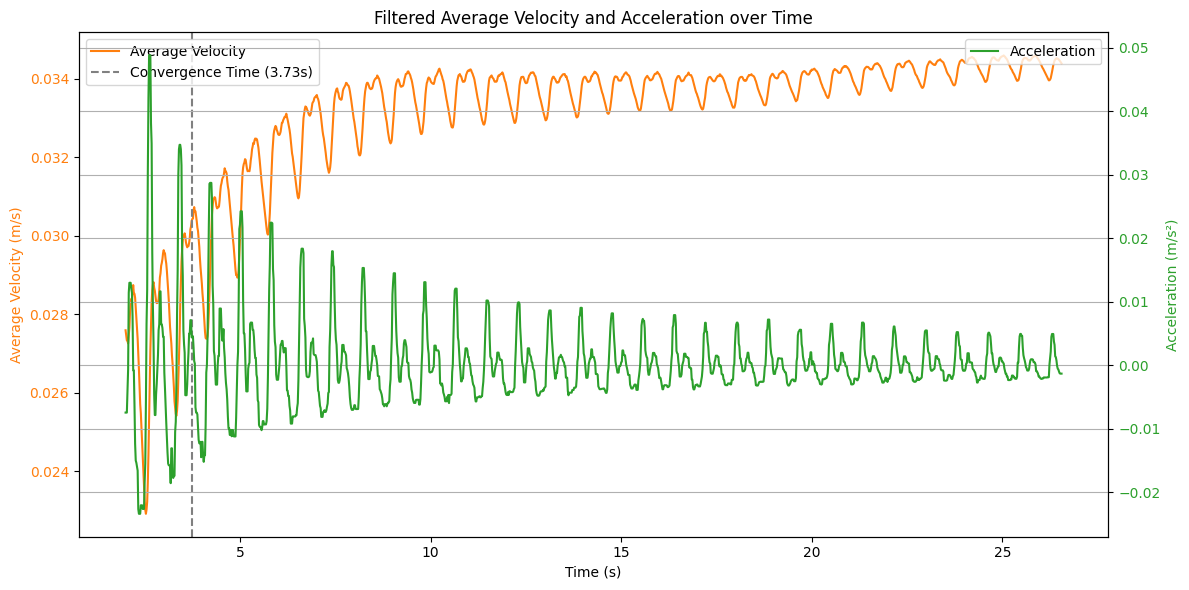

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

def analyze_and_plot(file_path, x_length_meters=1.6, y_length_meters=0.9, fps=60):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Define normalization factors 
    y_length_pixels = pd.to_numeric(df.iloc[2:, 1::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, 1::2].min().min(), errors='coerce')
    normalization_factor_y = y_length_meters / y_length_pixels

    x_length_pixels = pd.to_numeric(df.iloc[2:, ::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, ::2].min().min(), errors='coerce')
    normalization_factor_x = x_length_meters / x_length_pixels

    # Extract x and y coordinates for the markers, skipping the first two rows
    coordinates_df = df.iloc[2:, :44].apply(pd.to_numeric, errors='coerce')  # Ensure numeric values

    # Separate x and y coordinates and normalize them
    x_coords = coordinates_df.iloc[:, ::2] * normalization_factor_x  # Normalize x-coordinates
    y_coords = coordinates_df.iloc[:, 1::2] * normalization_factor_y  # Normalize y-coordinates

    # Calculate mean position over markers
    mean_x_position = x_coords.mean(axis=1).values
    mean_y_position = y_coords.mean(axis=1).values
    
    # Time array
    time = np.arange(len(mean_x_position)) / fps

    # --- Instantaneous Velocity Calculation ---
    # Calculate differences in position between consecutive frames
    delta_x = np.diff(mean_x_position)
    delta_y = np.diff(mean_y_position)
    
    # Compute instantaneous velocities
    velocity_x = delta_x * fps
    velocity_y = delta_y * fps
    instantaneous_velocity = np.sqrt(velocity_x**2 + velocity_y**2)

    # Adjust time array for instantaneous velocity
    time_instantaneous = time[1:]

    # --- Average Velocity Calculation ---
    # Calculate displacement from initial position at each time point
    displacement_x = mean_x_position - mean_x_position[0]
    displacement_y = mean_y_position - mean_y_position[0]
    total_displacement = np.sqrt(displacement_x**2 + displacement_y**2)
    
    # Avoid division by zero at t=0 by starting from index 1
    average_velocity = total_displacement[1:] / time[1:]

    # --- Compute dv/dt for Average Velocity ---
    dv = np.diff(average_velocity)
    dt = np.diff(time[1:])  # Time differences corresponding to dv
    dv_dt = dv / dt  # Acceleration (m/s^2)
    # Adjust time array for dv/dt
    time_dv_dt = time[2:]  # Since dv/dt is two elements shorter than time

    # --- Crop data for t from 2 to 40 seconds ---
    start_time = 2  # seconds
    end_time = 40  # seconds

    # Indices for the specified time range for average velocity and dv/dt
    indices_v = np.where((time[1:] >= start_time) & (time[1:] <= end_time))
    indices_dv_dt = np.where((time_dv_dt >= start_time) & (time_dv_dt <= end_time))

    # Crop the data arrays for average velocity
    cropped_time_v = time[1:][indices_v]
    cropped_avg_velocity = average_velocity[indices_v]

    # Crop the data arrays for dv/dt
    cropped_time_dv_dt = time_dv_dt[indices_dv_dt]
    cropped_dv_dt = dv_dt[indices_dv_dt]
    cropped_avg_velocity_for_dv_dt = average_velocity[1:][indices_dv_dt]  # Align average_velocity with dv/dt

    # --- Apply Median Filter to remove spikes in acceleration ---
    kernel_size = 5  # Choose a kernel size (odd number), larger sizes filter more aggressively
    filtered_dv_dt = medfilt(cropped_dv_dt, kernel_size)

    # --- Calculate the convergence time ---
    # Calculate the threshold based on the difference between max and min average velocities
    max_avg_velocity = np.max(cropped_avg_velocity)
    min_avg_velocity = np.min(cropped_avg_velocity)
    threshold_velocity = min_avg_velocity + (1 - 1/np.e) * (max_avg_velocity - min_avg_velocity)  # Approximately 63.2% between min and max

    # Find the time when average velocity reaches the threshold
    threshold_indices = np.where(cropped_avg_velocity >= threshold_velocity)[0]
    if len(threshold_indices) > 0:
        convergence_index = threshold_indices[0]
        convergence_time = cropped_time_v[convergence_index]
        print(f'The system converges to steady state at t = {convergence_time:.2f} seconds.')

        # --- Calculate and print the coasting number C ---
        C = convergence_time / 0.78125
        print(f'Coasting number C = {C:.2f}')
    else:
        convergence_time = None
        C = None
        print('The system did not reach the threshold for convergence within the specified time range.')

    # --- Plot dv/dt vs Average Velocity (Filtered) ---
    plt.figure(figsize=(12, 6))
    plt.plot(cropped_avg_velocity_for_dv_dt, filtered_dv_dt, label=r'$\frac{dv}{dt}$ vs $v$ (Filtered)', color='blue')
    plt.xlabel('Average Velocity $v$ (m/s)')
    plt.ylabel('Acceleration $dv/dt$ (m/s²)')
    plt.title(r'Acceleration vs Velocity ($\frac{dv}{dt}$ vs $v$) (Filtered, t = 2s to 40s)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Optional: Plot Filtered Average Velocity and dv/dt over Time ---
    fig, ax1 = plt.subplots(figsize=(12, 6))

    color = 'tab:orange'
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Average Velocity (m/s)', color=color)
    ax1.plot(cropped_time_v, cropped_avg_velocity, color=color, label='Average Velocity')
    ax1.tick_params(axis='y', labelcolor=color)

    # Draw vertical dashed line at convergence time
    if convergence_time is not None:
        ax1.axvline(x=convergence_time, color='gray', linestyle='--', label=f'Convergence Time ({convergence_time:.2f}s)')
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis

    color = 'tab:green'
    ax2.set_ylabel('Acceleration (m/s²)', color=color)
    ax2.plot(cropped_time_dv_dt, filtered_dv_dt, color=color, label='Acceleration')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    plt.title('Filtered Average Velocity and Acceleration over Time')
    fig.tight_layout()
    plt.grid(True)
    plt.show()

# Path to the CSV file
file_path = '/Users/jamesxu/Downloads/24cm_new-James-2024-10-02/videos/24cm_run8DLC_resnet50_24cm_newOct2shuffle1_100000_filtered.csv'

# Run the function
analyze_and_plot(file_path)



# 16cm


The system did not reach the threshold for convergence within the specified time range.


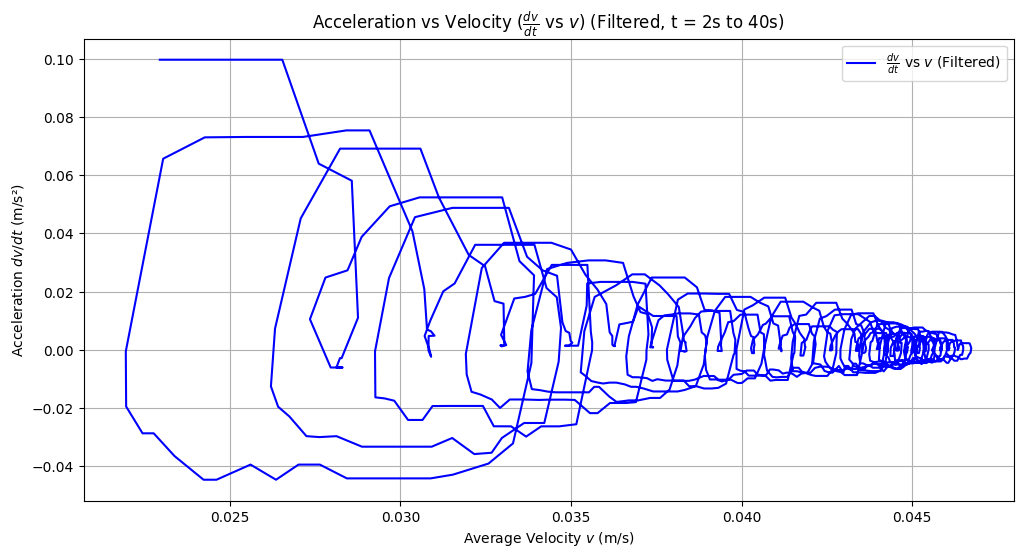

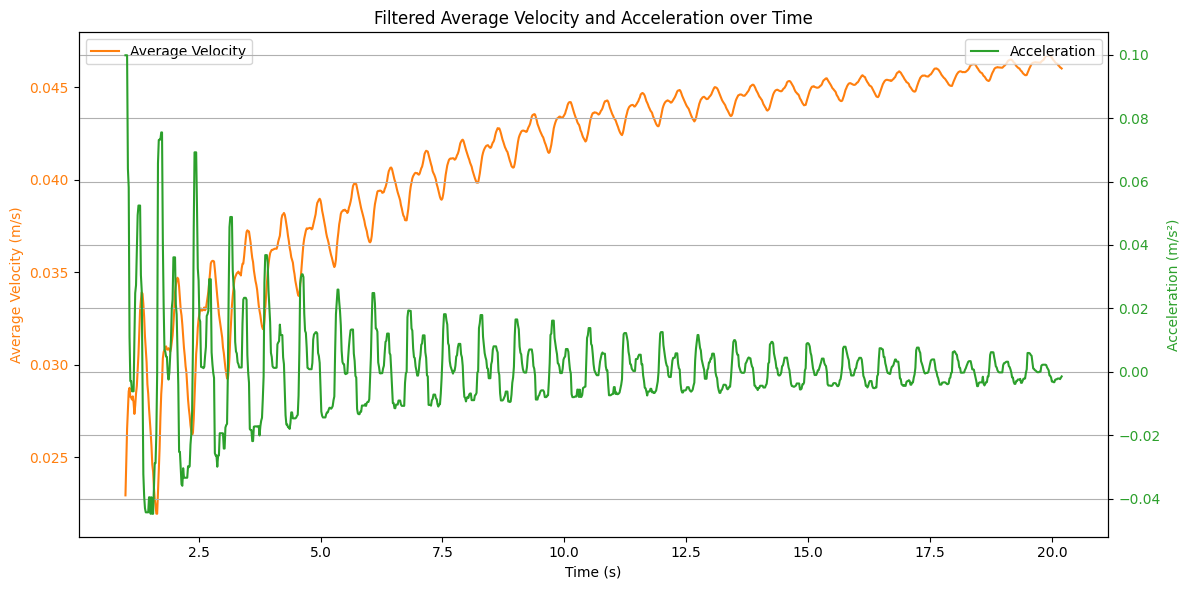

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

def analyze_and_plot(file_path, x_length_meters=1.6, y_length_meters=0.9, fps=60):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Define normalization factors 
    y_length_pixels = pd.to_numeric(df.iloc[2:, 1::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, 1::2].min().min(), errors='coerce')
    normalization_factor_y = y_length_meters / y_length_pixels

    x_length_pixels = pd.to_numeric(df.iloc[2:, ::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, ::2].min().min(), errors='coerce')
    normalization_factor_x = x_length_meters / x_length_pixels

    # Extract x and y coordinates for the markers, skipping the first two rows
    coordinates_df = df.iloc[2:, :44].apply(pd.to_numeric, errors='coerce')  # Ensure numeric values

    # Separate x and y coordinates and normalize them
    x_coords = coordinates_df.iloc[:, ::2] * normalization_factor_x  # Normalize x-coordinates
    y_coords = coordinates_df.iloc[:, 1::2] * normalization_factor_y  # Normalize y-coordinates

    # Calculate mean position over markers
    mean_x_position = x_coords.mean(axis=1).values
    mean_y_position = y_coords.mean(axis=1).values
    
    # Time array
    time = np.arange(len(mean_x_position)) / fps

    # --- Instantaneous Velocity Calculation ---
    # Calculate differences in position between consecutive frames
    delta_x = np.diff(mean_x_position)
    delta_y = np.diff(mean_y_position)
    
    # Compute instantaneous velocities
    velocity_x = delta_x * fps
    velocity_y = delta_y * fps
    instantaneous_velocity = np.sqrt(velocity_x**2 + velocity_y**2)

    # Adjust time array for instantaneous velocity
    time_instantaneous = time[1:]

    # --- Average Velocity Calculation ---
    # Calculate displacement from initial position at each time point
    displacement_x = mean_x_position - mean_x_position[0]
    displacement_y = mean_y_position - mean_y_position[0]
    total_displacement = np.sqrt(displacement_x**2 + displacement_y**2)
    
    # Avoid division by zero at t=0 by starting from index 1
    average_velocity = total_displacement[1:] / time[1:]

    # --- Compute dv/dt for Average Velocity ---
    dv = np.diff(average_velocity)
    dt = np.diff(time[1:])  # Time differences corresponding to dv
    dv_dt = dv / dt  # Acceleration (m/s^2)
    # Adjust time array for dv/dt
    time_dv_dt = time[2:]  # Since dv/dt is two elements shorter than time

    # --- Crop data for t from 2 to 40 seconds ---
    start_time = 1  # seconds
    end_time = 32  # seconds

    # Indices for the specified time range for average velocity and dv/dt
    indices_v = np.where((time[1:] >= start_time) & (time[1:] <= end_time))
    indices_dv_dt = np.where((time_dv_dt >= start_time) & (time_dv_dt <= end_time))

    # Crop the data arrays for average velocity
    cropped_time_v = time[1:][indices_v]
    cropped_avg_velocity = average_velocity[indices_v]

    # Crop the data arrays for dv/dt
    cropped_time_dv_dt = time_dv_dt[indices_dv_dt]
    cropped_dv_dt = dv_dt[indices_dv_dt]
    cropped_avg_velocity_for_dv_dt = average_velocity[1:][indices_dv_dt]  # Align average_velocity with dv/dt

    # --- Apply Median Filter to remove spikes in acceleration ---
    kernel_size = 5  # Choose a kernel size (odd number), larger sizes filter more aggressively
    filtered_dv_dt = medfilt(cropped_dv_dt, kernel_size)

    # --- Calculate the convergence time ---
    # Calculate the threshold based on the difference between max and min average velocities
    max_avg_velocity = np.max(cropped_avg_velocity)
    min_avg_velocity = np.min(cropped_avg_velocity)
    threshold_velocity = min_avg_velocity + (1 - 1/np.e) * (max_avg_velocity )  # Approximately 63.2% between min and max

    # Find the time when average velocity reaches the threshold
    threshold_indices = np.where(cropped_avg_velocity >= threshold_velocity)[0]
    if len(threshold_indices) > 0:
        convergence_index = threshold_indices[0]
        convergence_time = cropped_time_v[convergence_index]
        print(f'The system converges to steady state at t = {convergence_time:.2f} seconds.')

        # --- Calculate and print the coasting number C ---
        C = convergence_time / 0.78125
        print(f'Coasting number C = {C:.2f}')
    else:
        convergence_time = None
        C = None
        print('The system did not reach the threshold for convergence within the specified time range.')

    # --- Plot dv/dt vs Average Velocity (Filtered) ---
    plt.figure(figsize=(12, 6))
    plt.plot(cropped_avg_velocity_for_dv_dt, filtered_dv_dt, label=r'$\frac{dv}{dt}$ vs $v$ (Filtered)', color='blue')
    plt.xlabel('Average Velocity $v$ (m/s)')
    plt.ylabel('Acceleration $dv/dt$ (m/s²)')
    plt.title(r'Acceleration vs Velocity ($\frac{dv}{dt}$ vs $v$) (Filtered, t = 2s to 40s)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Optional: Plot Filtered Average Velocity and dv/dt over Time ---
    fig, ax1 = plt.subplots(figsize=(12, 6))

    color = 'tab:orange'
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Average Velocity (m/s)', color=color)
    ax1.plot(cropped_time_v, cropped_avg_velocity, color=color, label='Average Velocity')
    ax1.tick_params(axis='y', labelcolor=color)

    # Draw vertical dashed line at convergence time
    if convergence_time is not None:
        ax1.axvline(x=convergence_time, color='gray', linestyle='--', label=f'Convergence Time ({convergence_time:.2f}s)')
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis

    color = 'tab:green'
    ax2.set_ylabel('Acceleration (m/s²)', color=color)
    ax2.plot(cropped_time_dv_dt, filtered_dv_dt, color=color, label='Acceleration')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    plt.title('Filtered Average Velocity and Acceleration over Time')
    fig.tight_layout()
    plt.grid(True)
    plt.show()

# Path to the CSV file
file_path = '/Users/jamesxu/Downloads/tracking-2/16cm_new-James-2024-10-03/videos/16cm_run3DLC_resnet50_16cm_newOct3shuffle1_100000.csv'

# Run the function
analyze_and_plot(file_path)



The system converges to steady state at t = 2.93 seconds.
Coasting number C = 3.75


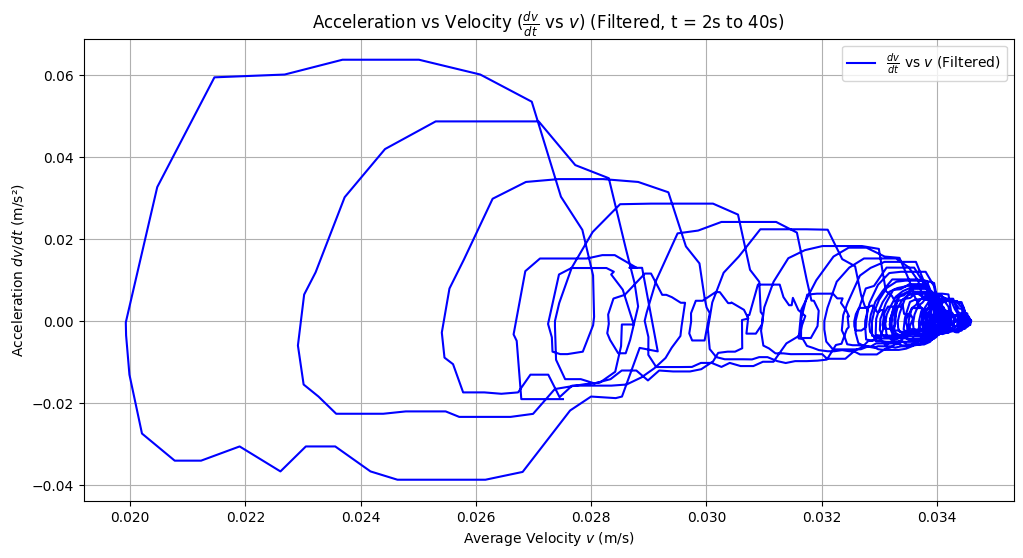

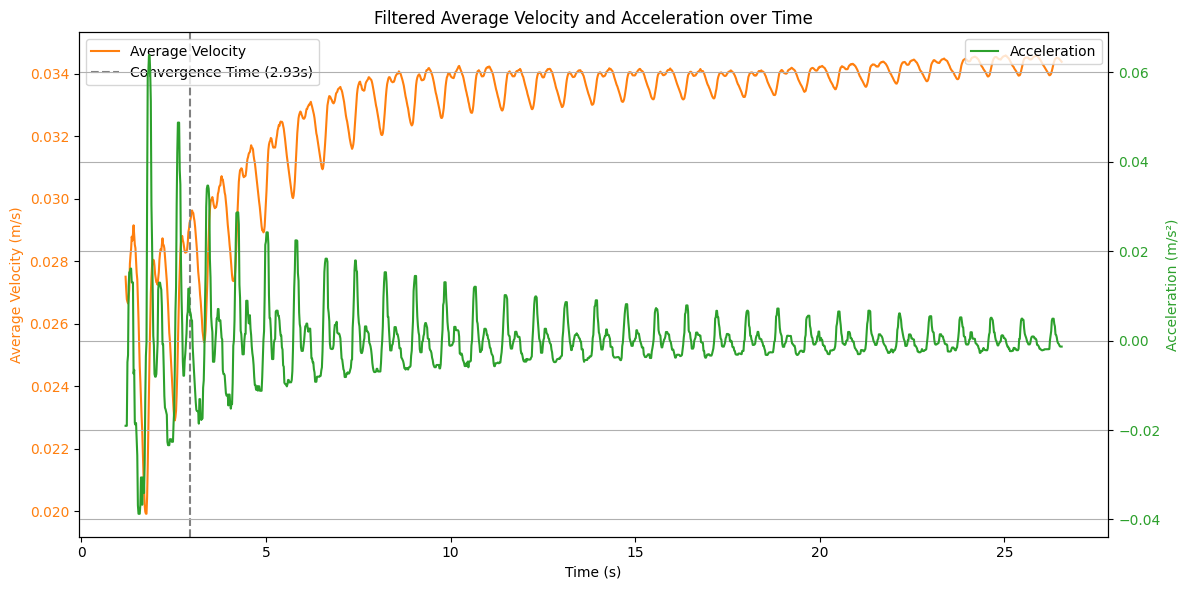

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

def analyze_and_plot(file_path, x_length_meters=1.6, y_length_meters=0.9, fps=60):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Define normalization factors 
    y_length_pixels = pd.to_numeric(df.iloc[2:, 1::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, 1::2].min().min(), errors='coerce')
    normalization_factor_y = y_length_meters / y_length_pixels

    x_length_pixels = pd.to_numeric(df.iloc[2:, ::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, ::2].min().min(), errors='coerce')
    normalization_factor_x = x_length_meters / x_length_pixels

    # Extract x and y coordinates for the markers, skipping the first two rows
    coordinates_df = df.iloc[2:, :44].apply(pd.to_numeric, errors='coerce')  # Ensure numeric values

    # Separate x and y coordinates and normalize them
    x_coords = coordinates_df.iloc[:, ::2] * normalization_factor_x  # Normalize x-coordinates
    y_coords = coordinates_df.iloc[:, 1::2] * normalization_factor_y  # Normalize y-coordinates

    # Calculate mean position over markers
    mean_x_position = x_coords.mean(axis=1).values
    mean_y_position = y_coords.mean(axis=1).values
    
    # Time array
    time = np.arange(len(mean_x_position)) / fps

    # --- Instantaneous Velocity Calculation ---
    # Calculate differences in position between consecutive frames
    delta_x = np.diff(mean_x_position)
    delta_y = np.diff(mean_y_position)
    
    # Compute instantaneous velocities
    velocity_x = delta_x * fps
    velocity_y = delta_y * fps
    instantaneous_velocity = np.sqrt(velocity_x**2 + velocity_y**2)

    # Adjust time array for instantaneous velocity
    time_instantaneous = time[1:]

    # --- Average Velocity Calculation ---
    # Calculate displacement from initial position at each time point
    displacement_x = mean_x_position - mean_x_position[0]
    displacement_y = mean_y_position - mean_y_position[0]
    total_displacement = np.sqrt(displacement_x**2 + displacement_y**2)
    
    # Avoid division by zero at t=0 by starting from index 1
    average_velocity = total_displacement[1:] / time[1:]

    # --- Compute dv/dt for Average Velocity ---
    dv = np.diff(average_velocity)
    dt = np.diff(time[1:])  # Time differences corresponding to dv
    dv_dt = dv / dt  # Acceleration (m/s^2)
    # Adjust time array for dv/dt
    time_dv_dt = time[2:]  # Since dv/dt is two elements shorter than time

    # --- Crop data for t from 2 to 40 seconds ---
    start_time = 1.2 # seconds
    end_time = 32  # seconds

    # Indices for the specified time range for average velocity and dv/dt
    indices_v = np.where((time[1:] >= start_time) & (time[1:] <= end_time))
    indices_dv_dt = np.where((time_dv_dt >= start_time) & (time_dv_dt <= end_time))

    # Crop the data arrays for average velocity
    cropped_time_v = time[1:][indices_v]
    cropped_avg_velocity = average_velocity[indices_v]

    # Crop the data arrays for dv/dt
    cropped_time_dv_dt = time_dv_dt[indices_dv_dt]
    cropped_dv_dt = dv_dt[indices_dv_dt]
    cropped_avg_velocity_for_dv_dt = average_velocity[1:][indices_dv_dt]  # Align average_velocity with dv/dt

    # --- Apply Median Filter to remove spikes in acceleration ---
    kernel_size = 5  # Choose a kernel size (odd number), larger sizes filter more aggressively
    filtered_dv_dt = medfilt(cropped_dv_dt, kernel_size)

    # --- Calculate the convergence time ---
    # Calculate the threshold based on the difference between max and min average velocities
    max_avg_velocity = np.max(cropped_avg_velocity)
    min_avg_velocity = np.min(cropped_avg_velocity)
    threshold_velocity = min_avg_velocity + (1 - 1/np.e) * (max_avg_velocity - min_avg_velocity)  # Approximately 63.2% between min and max

    # Find the time when average velocity reaches the threshold
    threshold_indices = np.where(cropped_avg_velocity >= threshold_velocity)[0]
    if len(threshold_indices) > 0:
        convergence_index = threshold_indices[0]
        convergence_time = cropped_time_v[convergence_index]
        print(f'The system converges to steady state at t = {convergence_time:.2f} seconds.')

        # --- Calculate and print the coasting number C ---
        C = convergence_time / 0.78125
        print(f'Coasting number C = {C:.2f}')
    else:
        convergence_time = None
        C = None
        print('The system did not reach the threshold for convergence within the specified time range.')

    # --- Plot dv/dt vs Average Velocity (Filtered) ---
    plt.figure(figsize=(12, 6))
    plt.plot(cropped_avg_velocity_for_dv_dt, filtered_dv_dt, label=r'$\frac{dv}{dt}$ vs $v$ (Filtered)', color='blue')
    plt.xlabel('Average Velocity $v$ (m/s)')
    plt.ylabel('Acceleration $dv/dt$ (m/s²)')
    plt.title(r'Acceleration vs Velocity ($\frac{dv}{dt}$ vs $v$) (Filtered, t = 2s to 40s)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Optional: Plot Filtered Average Velocity and dv/dt over Time ---
    fig, ax1 = plt.subplots(figsize=(12, 6))

    color = 'tab:orange'
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Average Velocity (m/s)', color=color)
    ax1.plot(cropped_time_v, cropped_avg_velocity, color=color, label='Average Velocity')
    ax1.tick_params(axis='y', labelcolor=color)

    # Draw vertical dashed line at convergence time
    if convergence_time is not None:
        ax1.axvline(x=convergence_time, color='gray', linestyle='--', label=f'Convergence Time ({convergence_time:.2f}s)')
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis

    color = 'tab:green'
    ax2.set_ylabel('Acceleration (m/s²)', color=color)
    ax2.plot(cropped_time_dv_dt, filtered_dv_dt, color=color, label='Acceleration')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    plt.title('Filtered Average Velocity and Acceleration over Time')
    fig.tight_layout()
    plt.grid(True)
    plt.show()

# Path to the CSV file
file_path = '/Users/jamesxu/Downloads/24cm_new-James-2024-10-02/videos/24cm_run8DLC_resnet50_24cm_newOct2shuffle1_100000_filtered.csv'

# Run the function
analyze_and_plot(file_path)



The system converges to steady state at t = 1.48 seconds.
Coasting number C = 1.90


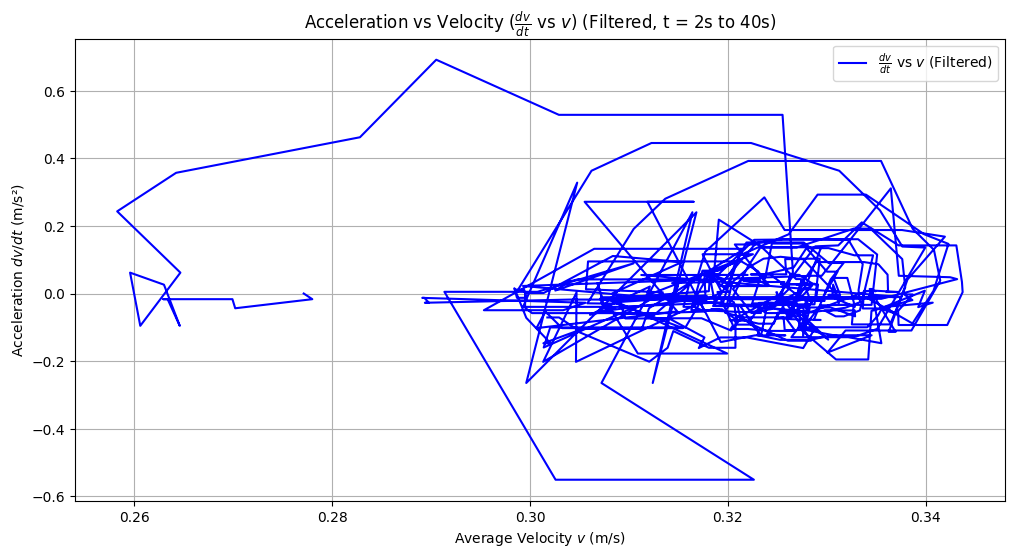

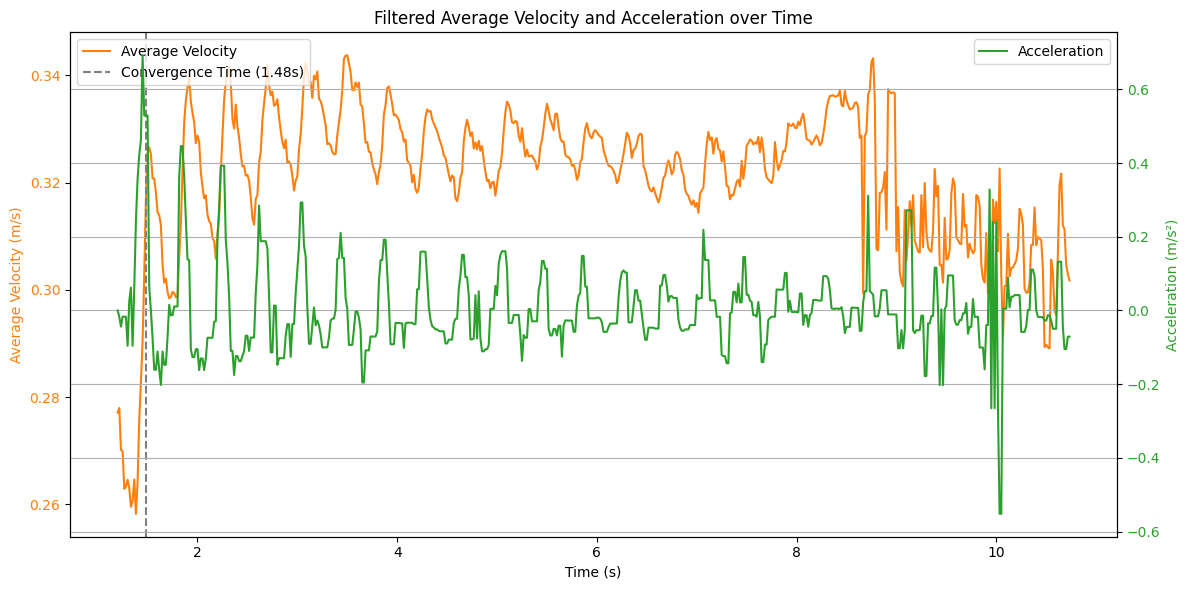

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

def analyze_and_plot(file_path, x_length_meters=1.6, y_length_meters=0.9, fps=60):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Define normalization factors 
    y_length_pixels = pd.to_numeric(df.iloc[2:, 1::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, 1::2].min().min(), errors='coerce')
    normalization_factor_y = y_length_meters / y_length_pixels

    x_length_pixels = pd.to_numeric(df.iloc[2:, ::2].max().max(), errors='coerce') - pd.to_numeric(df.iloc[2:, ::2].min().min(), errors='coerce')
    normalization_factor_x = x_length_meters / x_length_pixels

    # Extract x and y coordinates for the markers, skipping the first two rows
    coordinates_df = df.iloc[2:, :44].apply(pd.to_numeric, errors='coerce')  # Ensure numeric values

    # Separate x and y coordinates and normalize them
    x_coords = coordinates_df.iloc[:, ::2] * normalization_factor_x  # Normalize x-coordinates
    y_coords = coordinates_df.iloc[:, 1::2] * normalization_factor_y  # Normalize y-coordinates

    # Calculate mean position over markers
    mean_x_position = x_coords.mean(axis=1).values
    mean_y_position = y_coords.mean(axis=1).values
    
    # Time array
    time = np.arange(len(mean_x_position)) / fps

    # --- Instantaneous Velocity Calculation ---
    # Calculate differences in position between consecutive frames
    delta_x = np.diff(mean_x_position)
    delta_y = np.diff(mean_y_position)
    
    # Compute instantaneous velocities
    velocity_x = delta_x * fps
    velocity_y = delta_y * fps
    instantaneous_velocity = np.sqrt(velocity_x**2 + velocity_y**2)

    # Adjust time array for instantaneous velocity
    time_instantaneous = time[1:]

    # --- Average Velocity Calculation ---
    # Calculate displacement from initial position at each time point
    displacement_x = mean_x_position - mean_x_position[0]
    displacement_y = mean_y_position - mean_y_position[0]
    total_displacement = np.sqrt(displacement_x**2 + displacement_y**2)
    
    # Avoid division by zero at t=0 by starting from index 1
    average_velocity = total_displacement[1:] / time[1:]

    # --- Compute dv/dt for Average Velocity ---
    dv = np.diff(average_velocity)
    dt = np.diff(time[1:])  # Time differences corresponding to dv
    dv_dt = dv / dt  # Acceleration (m/s^2)
    # Adjust time array for dv/dt
    time_dv_dt = time[2:]  # Since dv/dt is two elements shorter than time

    # --- Crop data for t from 2 to 40 seconds ---
    start_time = 1.2 # seconds
    end_time =19  # seconds

    # Indices for the specified time range for average velocity and dv/dt
    indices_v = np.where((time[1:] >= start_time) & (time[1:] <= end_time))
    indices_dv_dt = np.where((time_dv_dt >= start_time) & (time_dv_dt <= end_time))

    # Crop the data arrays for average velocity
    cropped_time_v = time[1:][indices_v]
    cropped_avg_velocity = average_velocity[indices_v]

    # Crop the data arrays for dv/dt
    cropped_time_dv_dt = time_dv_dt[indices_dv_dt]
    cropped_dv_dt = dv_dt[indices_dv_dt]
    cropped_avg_velocity_for_dv_dt = average_velocity[1:][indices_dv_dt]  # Align average_velocity with dv/dt

    # --- Apply Median Filter to remove spikes in acceleration ---
    kernel_size = 5  # Choose a kernel size (odd number), larger sizes filter more aggressively
    filtered_dv_dt = medfilt(cropped_dv_dt, kernel_size)

    # --- Calculate the convergence time ---
    # Calculate the threshold based on the difference between max and min average velocities
    max_avg_velocity = np.max(cropped_avg_velocity)
    min_avg_velocity = np.min(cropped_avg_velocity)
    threshold_velocity = min_avg_velocity + (1 - 1/np.e) * (max_avg_velocity - min_avg_velocity)  # Approximately 63.2% between min and max

    # Find the time when average velocity reaches the threshold
    threshold_indices = np.where(cropped_avg_velocity >= threshold_velocity)[0]
    if len(threshold_indices) > 0:
        convergence_index = threshold_indices[0]
        convergence_time = cropped_time_v[convergence_index]
        print(f'The system converges to steady state at t = {convergence_time:.2f} seconds.')

        # --- Calculate and print the coasting number C ---
        C = convergence_time / 0.78125
        print(f'Coasting number C = {C:.2f}')
    else:
        convergence_time = None
        C = None
        print('The system did not reach the threshold for convergence within the specified time range.')

    # --- Plot dv/dt vs Average Velocity (Filtered) ---
    plt.figure(figsize=(12, 6))
    plt.plot(cropped_avg_velocity_for_dv_dt, filtered_dv_dt, label=r'$\frac{dv}{dt}$ vs $v$ (Filtered)', color='blue')
    plt.xlabel('Average Velocity $v$ (m/s)')
    plt.ylabel('Acceleration $dv/dt$ (m/s²)')
    plt.title(r'Acceleration vs Velocity ($\frac{dv}{dt}$ vs $v$) (Filtered, t = 2s to 40s)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Optional: Plot Filtered Average Velocity and dv/dt over Time ---
    fig, ax1 = plt.subplots(figsize=(12, 6))

    color = 'tab:orange'
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Average Velocity (m/s)', color=color)
    ax1.plot(cropped_time_v, cropped_avg_velocity, color=color, label='Average Velocity')
    ax1.tick_params(axis='y', labelcolor=color)

    # Draw vertical dashed line at convergence time
    if convergence_time is not None:
        ax1.axvline(x=convergence_time, color='gray', linestyle='--', label=f'Convergence Time ({convergence_time:.2f}s)')
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis

    color = 'tab:green'
    ax2.set_ylabel('Acceleration (m/s²)', color=color)
    ax2.plot(cropped_time_dv_dt, filtered_dv_dt, color=color, label='Acceleration')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    plt.title('Filtered Average Velocity and Acceleration over Time')
    fig.tight_layout()
    plt.grid(True)
    plt.show()

# Path to the CSV file
file_path = '/Users/jamesxu/Downloads/old_data/24cm/videos/6joints_24cm_1.15Hz_compressedDLC_resnet50_24cmSep26shuffle1_100000.csv'

# Run the function
analyze_and_plot(file_path)



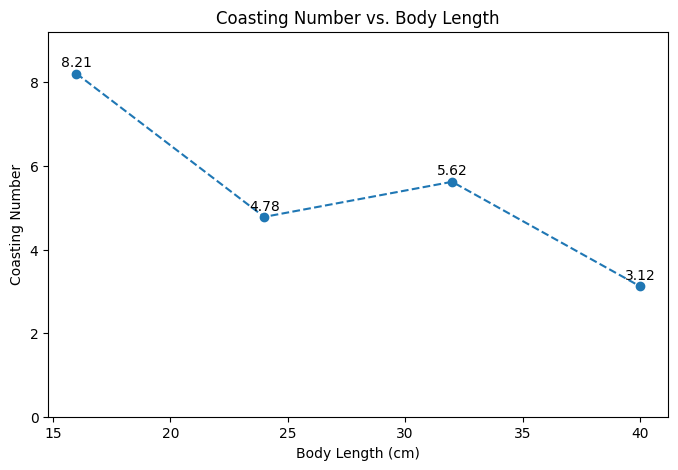

In [89]:
import matplotlib.pyplot as plt

# Data for plotting
body_length = [16, 24, 32, 40]  # in cm
coasting_number = [8.21, 4.78, 5.62, 3.12]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(body_length, coasting_number, marker='o', linestyle='--')  # Dashed line style
plt.title("Coasting Number vs. Body Length")
plt.xlabel("Body Length (cm)")
plt.ylabel("Coasting Number")
plt.ylim(0, max(coasting_number) + 1)  # Start y-axis from zero

# Adding data labels
for i, txt in enumerate(coasting_number):
    plt.annotate(f"{txt}", (body_length[i], coasting_number[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.show()


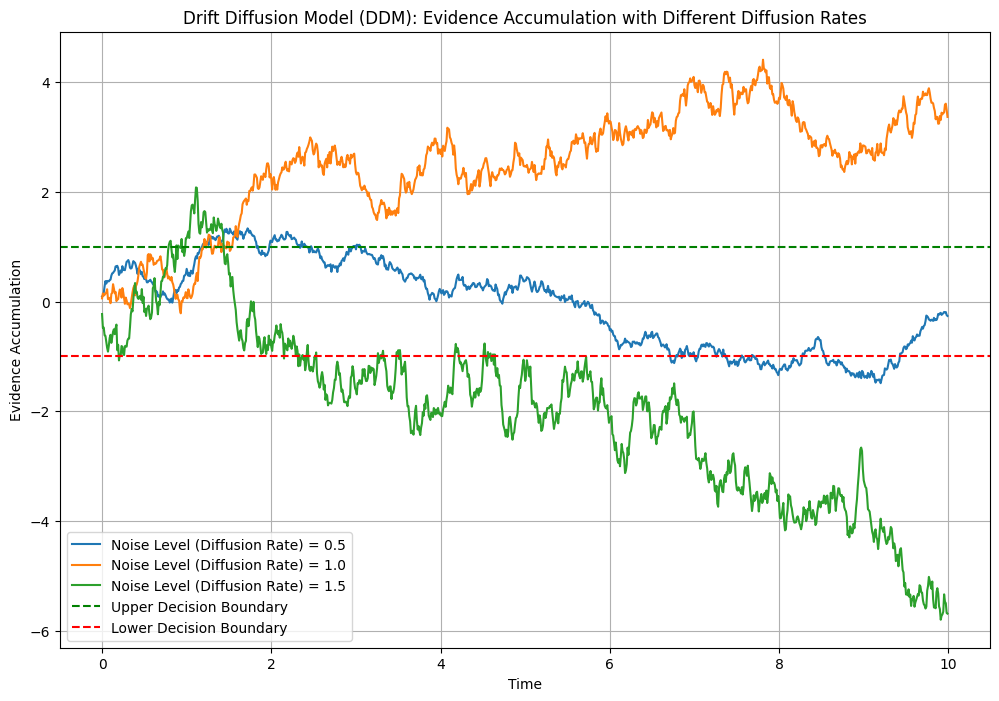

array([ 1.59327362e+00,  5.68722399e-01, -1.14487046e-01,  2.51630249e-01,
       -1.21085564e+00, -3.93733712e-01,  8.52525746e-02,  9.94219867e-02,
       -1.53061624e+00,  3.27623179e-01,  2.79196493e-01, -3.77051206e-01,
        4.17499908e-03, -1.48349155e+00, -1.47979562e+00,  1.34687262e-01,
       -6.67723191e-01, -1.15555202e-02,  8.39490672e-01, -1.73929930e-01,
       -2.81066805e+00, -1.50653638e-01, -4.81044022e-01, -2.34694354e-01,
        8.99730813e-01, -1.57853019e+00,  2.43956624e-01,  1.57030391e+00,
       -6.25943115e-01,  4.72327886e-01,  9.66305779e-01,  2.10231439e-01,
       -6.85096980e-01, -7.09521011e-01,  7.43800154e-01,  5.92149091e-01,
       -7.86468415e-01, -1.17647315e+00, -1.28080671e+00,  1.66165186e+00,
       -6.79451204e-02,  2.36022859e+00,  5.55545603e-01,  4.39522323e-01,
        3.06272488e-01,  9.99149850e-01, -9.66063185e-01,  2.16001311e+00,
       -1.00301703e-01, -7.03400092e-01,  3.02561002e-01,  1.09233888e+00,
       -1.00755488e+00,  

In [101]:
# Re-import necessary libraries and re-define parameters due to execution state reset
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Drift Diffusion Model (DDM)
drift_rate = 0.2  # Drift rate (mu)
time_steps = 1000  # Number of time steps
dt = 0.01  # Time step duration
decision_boundary = 1.0  # Decision threshold

# Different diffusion (noise) levels for comparison
diffusion_rates = [0.5, 1.0, 1.5]  # Standard deviation of noise

# Generate evidence accumulation paths for each diffusion rate
np.random.seed(0)  # For reproducibility
time = np.arange(0, time_steps * dt, dt)
paths = {}

for noise_level in diffusion_rates:
    evidence_path = np.cumsum(drift_rate * dt + noise_level * np.sqrt(dt) * np.random.randn(time_steps))
    paths[noise_level] = evidence_path

# Plot the evidence accumulation over time with different diffusion rates
plt.figure(figsize=(12, 8))
for noise_level, evidence in paths.items():
    plt.plot(time, evidence, label=f"Noise Level (Diffusion Rate) = {noise_level}")

# Add decision boundaries
plt.axhline(y=decision_boundary, color="green", linestyle="--", label="Upper Decision Boundary")
plt.axhline(y=-decision_boundary, color="red", linestyle="--", label="Lower Decision Boundary")

plt.xlabel("Time")
plt.ylabel("Evidence Accumulation")
plt.title("Drift Diffusion Model (DDM): Evidence Accumulation with Different Diffusion Rates")
plt.legend()
plt.grid()
plt.show()



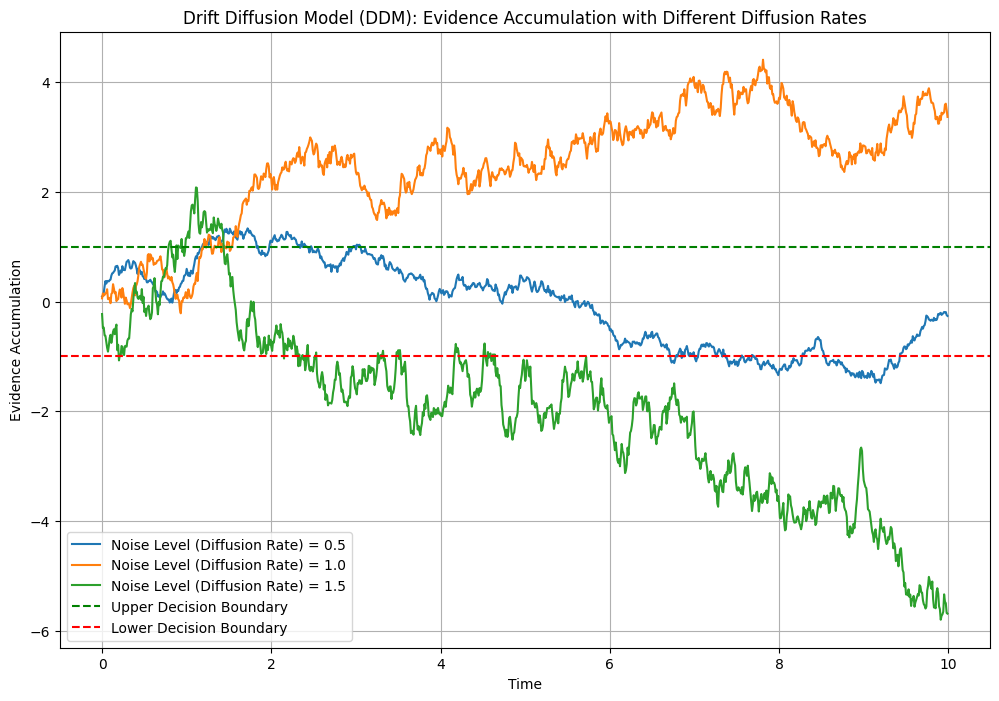

In [102]:
# Re-import necessary libraries and re-define parameters due to execution state reset
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Drift Diffusion Model (DDM)
drift_rate = 0.2  # Drift rate (mu)
time_steps = 1000  # Number of time steps
dt = 0.01  # Time step duration
decision_boundary = 1.0  # Decision threshold

# Different diffusion (noise) levels for comparison
diffusion_rates = [0.5, 1.0, 1.5]  # Standard deviation of noise

# Generate evidence accumulation paths for each diffusion rate
np.random.seed(0)  # For reproducibility
time = np.arange(0, time_steps * dt, dt)
paths = {}

for noise_level in diffusion_rates:
    evidence_path = np.cumsum(drift_rate * dt + noise_level * np.sqrt(dt) * np.random.randn(time_steps))
    paths[noise_level] = evidence_path

# Plot the evidence accumulation over time with different diffusion rates
plt.figure(figsize=(12, 8))
for noise_level, evidence in paths.items():
    plt.plot(time, evidence, label=f"Noise Level (Diffusion Rate) = {noise_level}")

# Add decision boundaries
plt.axhline(y=decision_boundary, color="green", linestyle="--", label="Upper Decision Boundary")
plt.axhline(y=-decision_boundary, color="red", linestyle="--", label="Lower Decision Boundary")

plt.xlabel("Time")
plt.ylabel("Evidence Accumulation")
plt.title("Drift Diffusion Model (DDM): Evidence Accumulation with Different Diffusion Rates")
plt.legend()
plt.grid()
plt.show()

